<a href="https://colab.research.google.com/github/scorp-jr/DBScan-UGR-6190-15-ML_Lab/blob/main/DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [13]:
def plot_clusters(X, labels, title):
    unique_labels = set(labels)

    for label in unique_labels:
        if label == -1:
            color = "black"   # noise
        else:
            color = None

        plt.scatter(
            X[labels == label, 0],
            X[labels == label, 1],
            c=color,
            label=f"Cluster {label}",
            s=30
        )

    plt.title(title)
    plt.legend()
    plt.show()


In [14]:
def safe_silhouette_score(X, labels):
    mask = labels != -1

    if len(set(labels[mask])) < 2:
        return None

    return silhouette_score(X[mask], labels[mask])


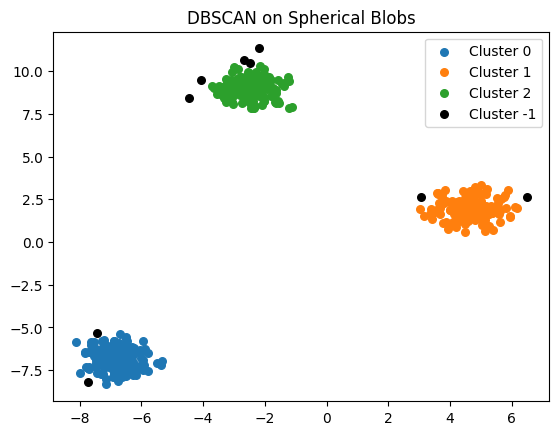

Silhouette Score: 0.9090907050373916


In [15]:
X_blobs, _ = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=0.6,
    random_state=42
)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_blobs)

plot_clusters(X_blobs, labels, "DBSCAN on Spherical Blobs")

print("Silhouette Score:", safe_silhouette_score(X_blobs, labels))


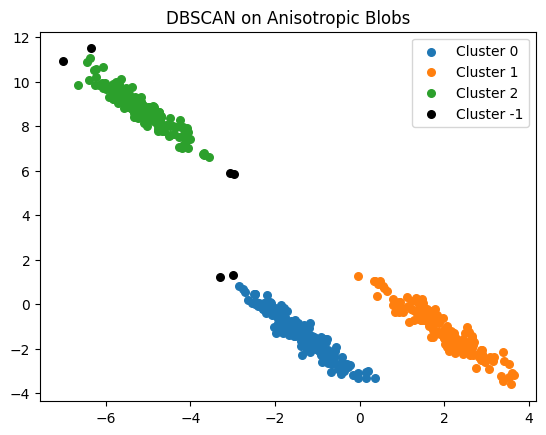

Silhouette Score: 0.697453543364141


In [20]:
X_aniso, _ = make_blobs(
    n_samples=500,
    centers=3,
    random_state=42
)

transformation = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = X_aniso @ transformation

labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_aniso)

plot_clusters(X_aniso, labels, "DBSCAN on Anisotropic Blobs")

print("Silhouette Score:", safe_silhouette_score(X_aniso, labels))


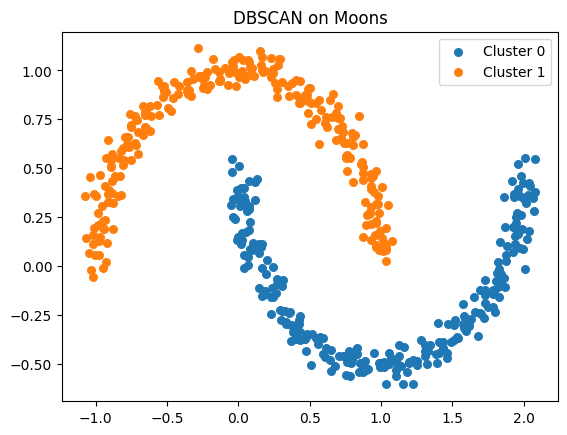

Silhouette Score: 0.3340617528457047


In [17]:
X_moons, _ = make_moons(
    n_samples=500,
    noise=0.05,
    random_state=42
)

labels = DBSCAN(eps=0.3, min_samples=5).fit_predict(X_moons)

plot_clusters(X_moons, labels, "DBSCAN on Moons")

print("Silhouette Score:", safe_silhouette_score(X_moons, labels))
